<a href="https://colab.research.google.com/github/quantumseminar/textbook/blob/main/04gate/02gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ブロッホ球

前回は簡単に概要を確認しました。量子ビットのデータは1量子ビットの場合には、概念的にブロッホ球というデータを表現する球の表面を取ります。

![../img/02gate_01.jpg](../img/02gate_01.jpg)

## XYZ軸
まず、ブロッホ球には軸があります。X軸、Y軸、Z軸が大事です。

## データは0からスタート
データは0からスタートします。縦のZ軸の上の頂点が0に相当します。物理ではこの0を|0>のように囲んで表現しますが、ケットゼロと呼びます。


## 量子ゲート
量子コンピュータはこのデータを操作しますが、球の中心の周りの回転で操作をします。量子ゲートはこの回転の仕方を指示するものです。

## 固定回転パウリゲート
基本の固定回転を紹介します。それぞれXYZ軸周りに180度回転するゲートをそれぞれXゲート、Yゲート、Zゲートと呼びます。それらをまとめてパウリゲートと呼びます。

Xゲート (X軸周りに180度固定回転)

![../img/02gate_02.jpg](../img/02gate_02.jpg)

Yゲート (Y軸周りに180度固定回転)

![../img/02gate_03.jpg](../img/02gate_03.jpg)


Zゲート (Z軸周りに180度固定回転)

![../img/02gate_04.jpg](../img/02gate_04.jpg)

## 測定
計算した後には測定が必要になる。簡単にいうと計算した結果を全てZ軸の0か1に戻す必要がある。データは必ずしもZ軸上にないので、その場合には、確率振幅（かくりつしんぷく）というデータの位置に合わせて元まる値から確率的に0か1を最後に決める。今回はすぐにはこれは学ばない。

## ちょっと計算してみる
Qiskitで計算してみましょう。（オプションで-qをつけると出力のテキストが出なくなる）

In [14]:
!pip install -q qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.0 MB/s eta 0:00:00


## ツールの読み込み、量子ビットを準備する
ツールを読み込み、1量子ビットを準備します。

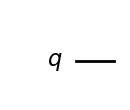

In [42]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を準備。量子ゲートとその結果を格納する古典レジスタと呼ばれるものを準備
qc = QuantumCircuit(1)

# 回路を確認する
qc.draw(output='mpl')

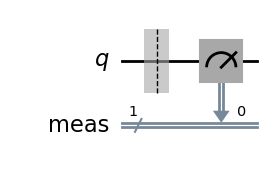

In [43]:
# 測定で結果を確定する操作
qc.measure_all()

# もう一回確認してみる
qc.draw(output='mpl')

{'0': 1024}


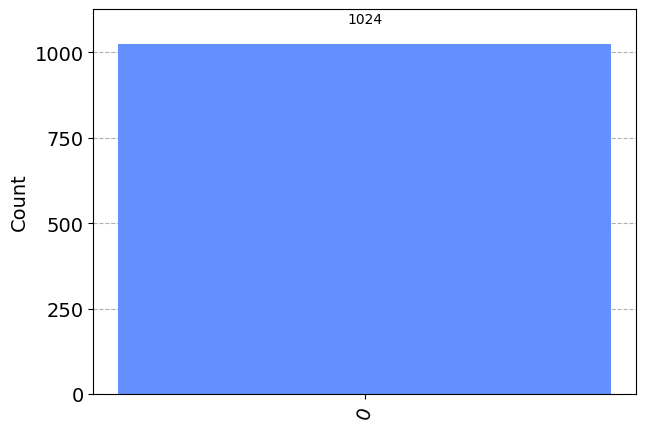

In [44]:
# シミュレーターの設定
aersim = AerSimulator(method='statevector')

# 回路の実行。標準で1024回同じ計算を実行
result = aersim.run(qc).result()
counts = result.get_counts(0)

print(counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

何もゲートをかけていないので、0のままに。次に
Xゲートをかけてみる。


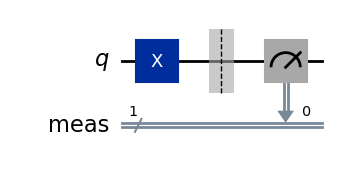

In [45]:
# 量子回路を準備。量子ゲートとその結果を格納する古典レジスタと呼ばれるものを準備
qc = QuantumCircuit(1)

# Xゲートを0番目の量子ビットに適用
qc.x(0)

# 測定で結果を確定する操作
qc.measure_all()

# 回路を確認する
qc.draw(output='mpl')

{'1': 1024}


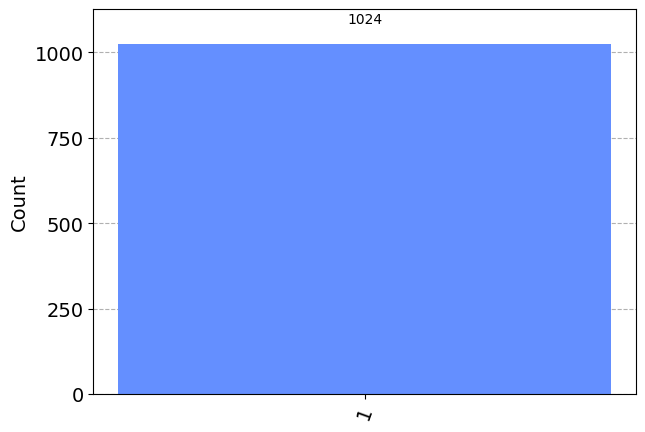

In [46]:
# 回路の実行。標準で1024回同じ計算を実行
result = aersim.run(qc).result()
counts = result.get_counts(0)

print(counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

今度は1000回1が出ました。これは0からX軸周りに180度回転させたので、1になりました。

試しに、YゲートとZゲートも。

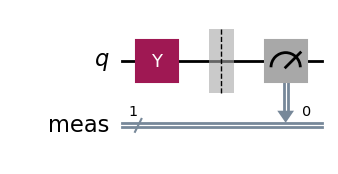

In [47]:
# 量子回路を準備。量子ゲートとその結果を格納する古典レジスタと呼ばれるものを準備
qc = QuantumCircuit(1)

# Xゲートを0番目の量子ビットに適用
qc.y(0)

# 測定で結果を確定する操作
qc.measure_all()

# 回路を確認する
qc.draw(output='mpl')

{'1': 1024}


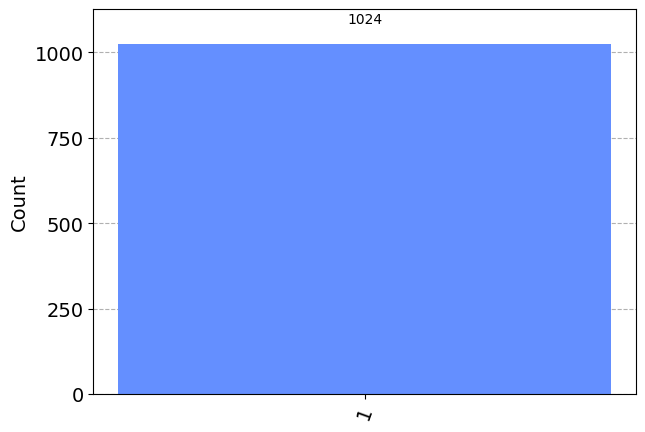

In [48]:
# 回路の実行。標準で1024回同じ計算を実行
result = aersim.run(qc).result()
counts = result.get_counts(0)

print(counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

Y軸周りに回転させても1になりました。

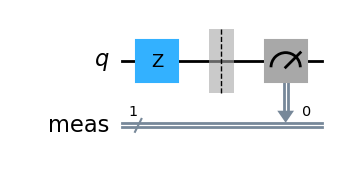

In [49]:
# 量子回路を準備。量子ゲートとその結果を格納する古典レジスタと呼ばれるものを準備
qc = QuantumCircuit(1)

# Xゲートを0番目の量子ビットに適用
qc.z(0)

# 測定で結果を確定する操作
qc.measure_all()

# 回路を確認する
qc.draw(output='mpl')

{'0': 1024}


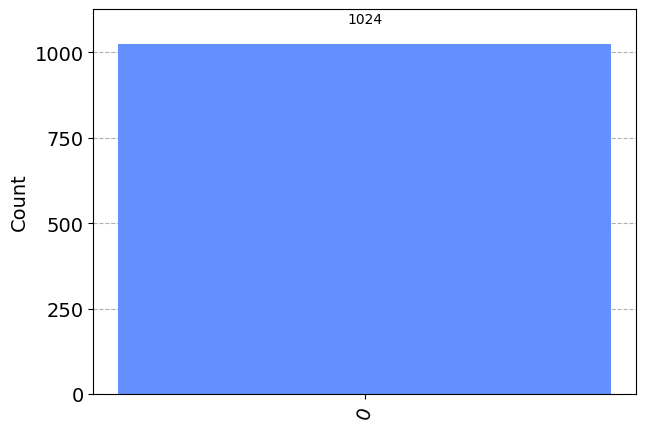

In [50]:
# 回路の実行。標準で1024回同じ計算を実行
result = aersim.run(qc).result()
counts = result.get_counts(0)

print(counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

最初0の時にZ軸まわりで回転させても0のままでした。

## Hゲート（アダマールゲート）
Zが使えないと困るので、便利なアダマールゲートを考えます。
これはXとZ軸の間45度に新しく軸を作って180度回転させます。

![../img/02gate_05.jpg](../img/02gate_05.jpg)